resample-data/User26_RU_02.csv


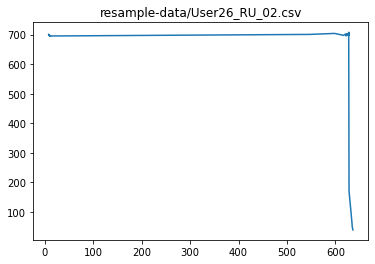

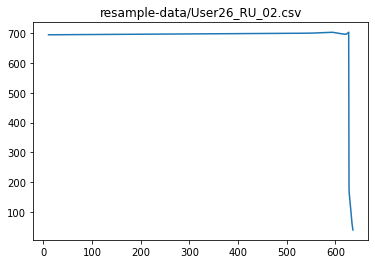

resample-data/User24_LD_02.csv


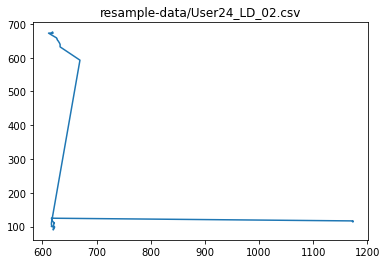

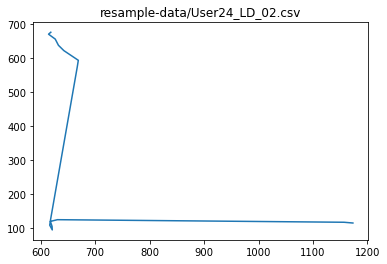

resample-data/User27_DU_01.csv


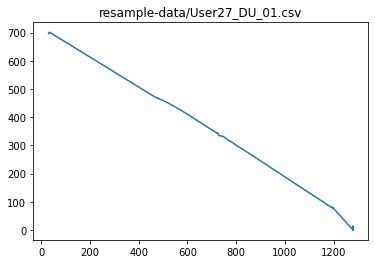

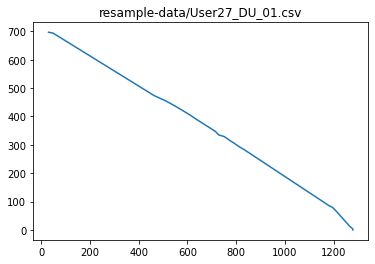

resample-data/User25_DL_02.csv


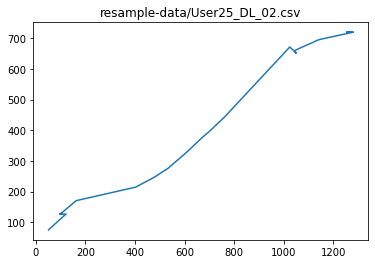

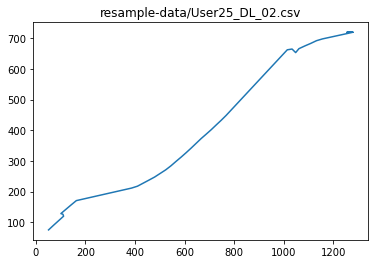

resample-data/User23_RD_01.csv


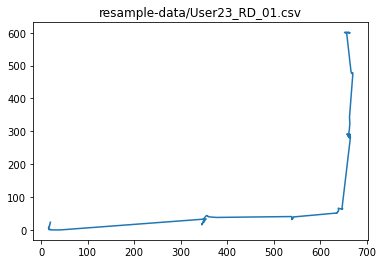

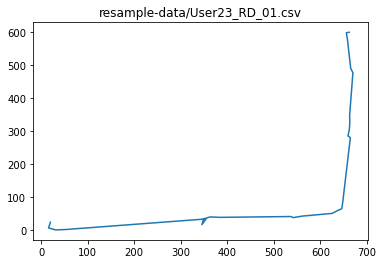

resample-data/User24_LD_01.csv


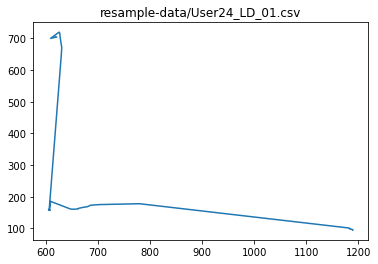

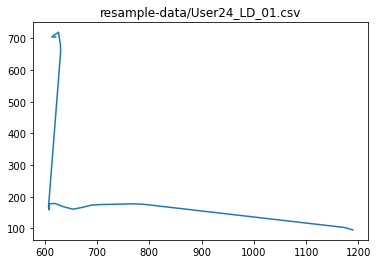

resample-data/User26_RU_01.csv


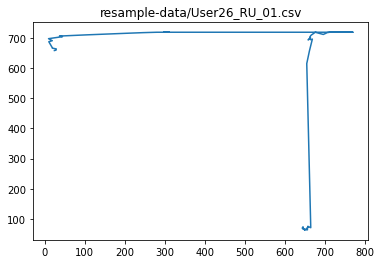

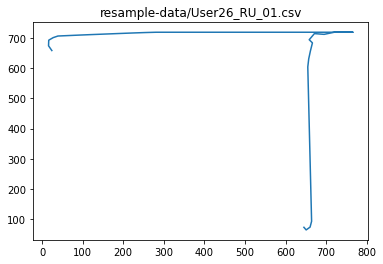

resample-data/User27_DU_02.csv


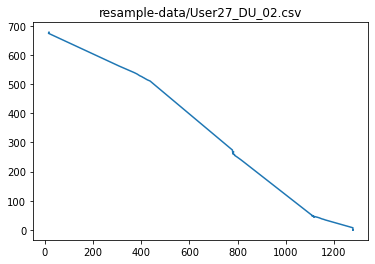

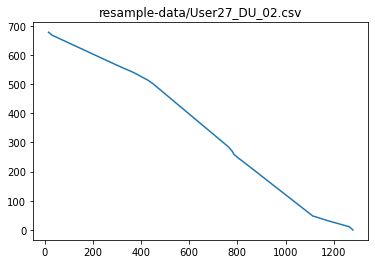

resample-data/User25_DL_01.csv


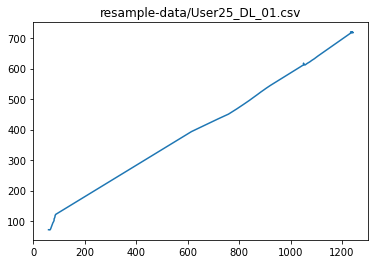

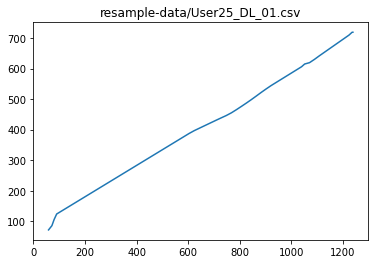

resample-data/User23_RD_02.csv


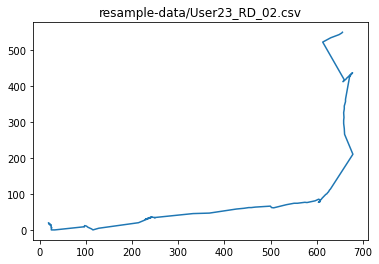

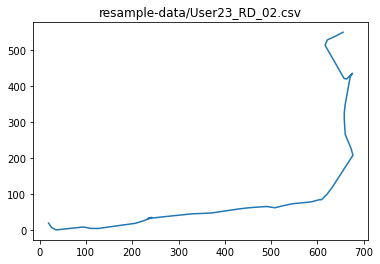

resample-data/User27_LU_01.csv


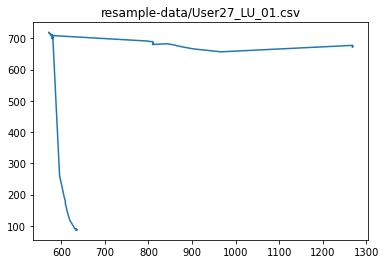

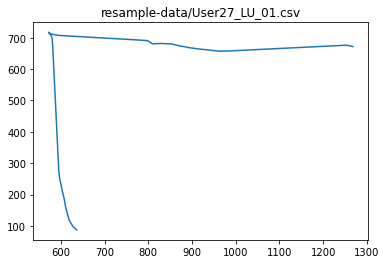

resample-data/User25_RD_01.csv


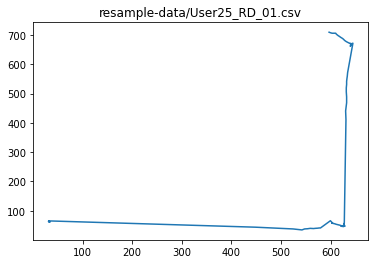

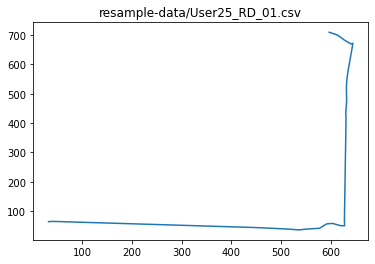

resample-data/User23_DL_02.csv


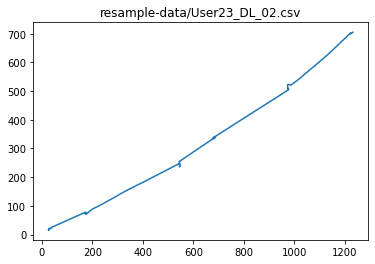

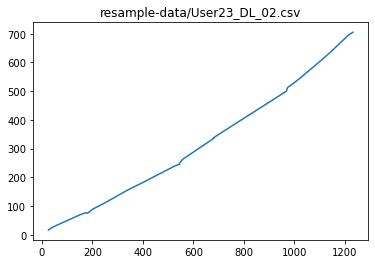

resample-data/User25_RD_02.csv


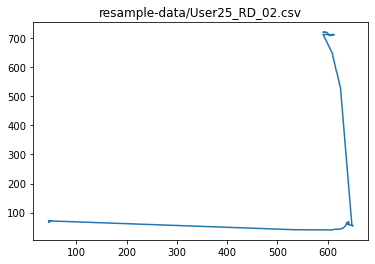

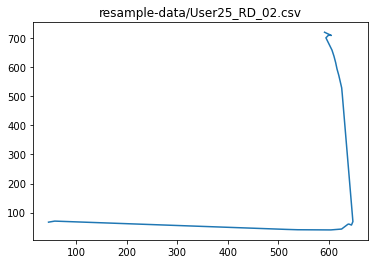

resample-data/User27_LU_02.csv


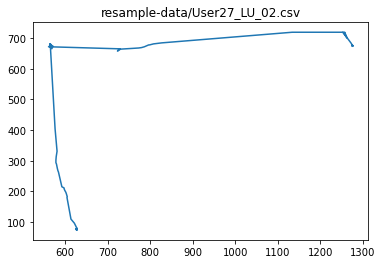

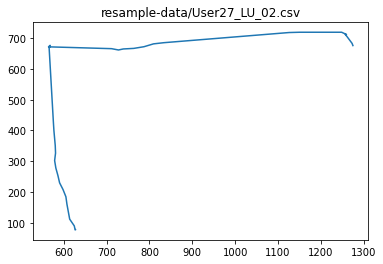

resample-data/User23_DL_01.csv


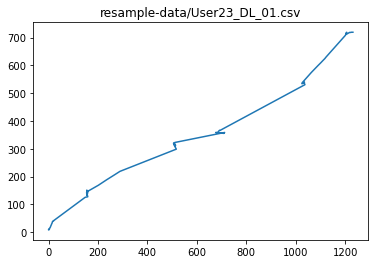

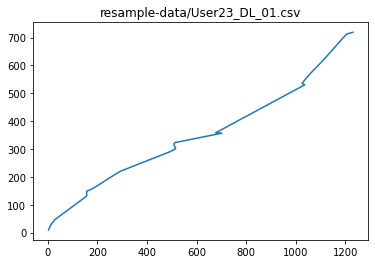

resample-data/User26_DU_01.csv


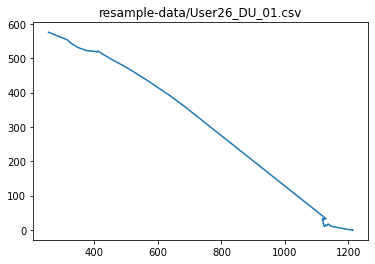

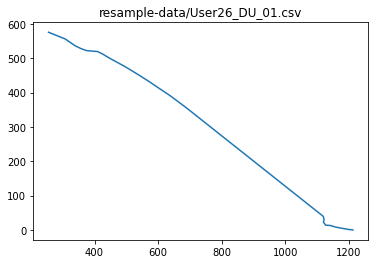

resample-data/User27_RU_02.csv


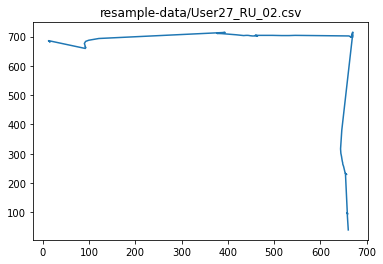

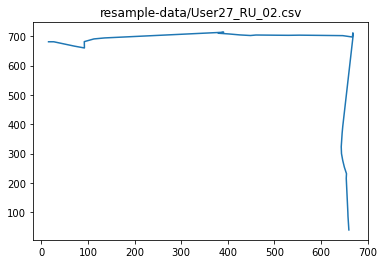

resample-data/User25_LD_02.csv


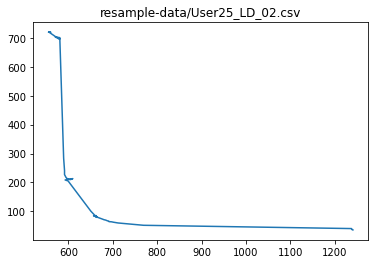

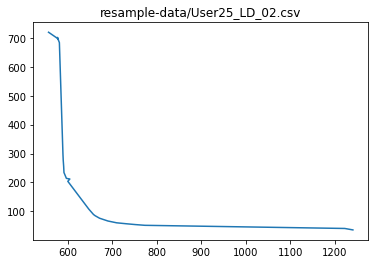

resample-data/User24_DL_02.csv


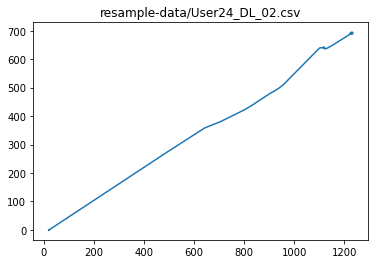

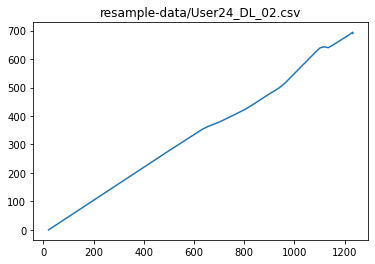

resample-data/User26_DU_02.csv


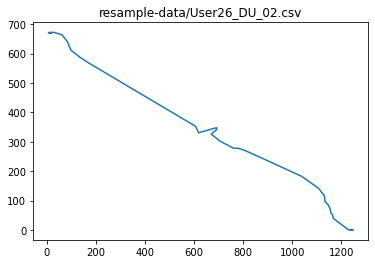

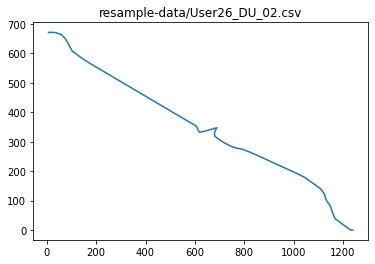

resample-data/User25_LD_01.csv


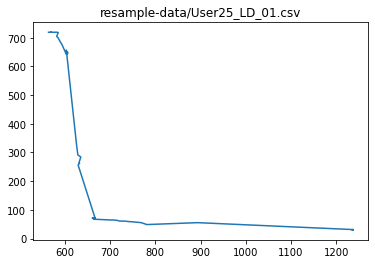

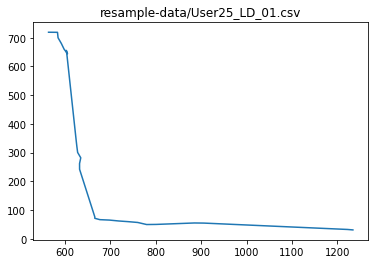

resample-data/User27_RU_01.csv


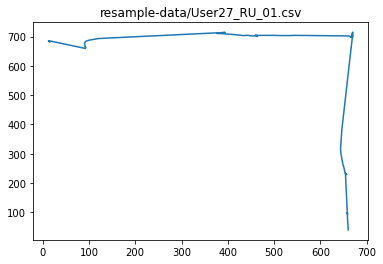

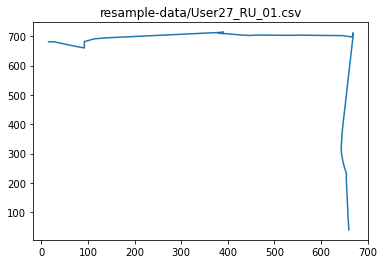

resample-data/User24_DL_01.csv


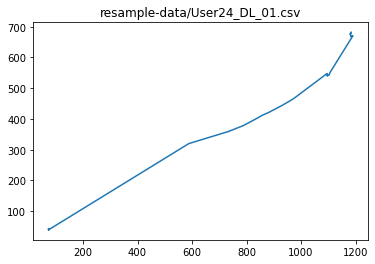

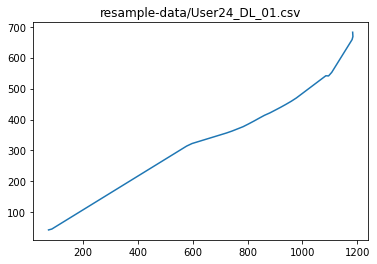

resample-data/User26_LU_01.csv


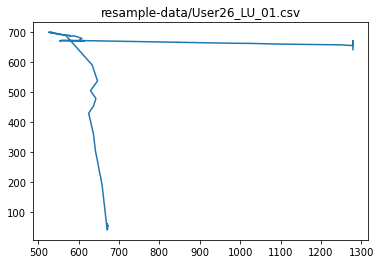

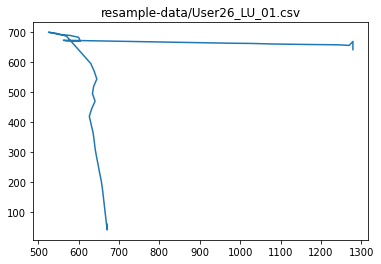

resample-data/User24_RD_01.csv


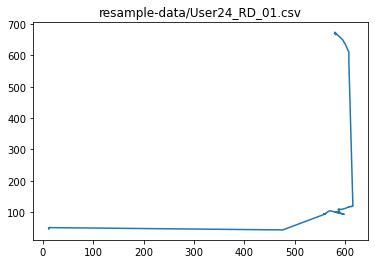

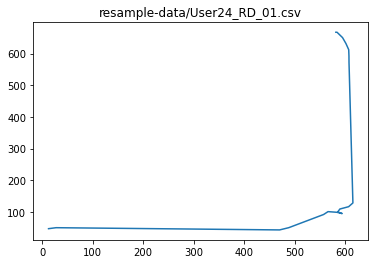

resample-data/User23_LD_02.csv


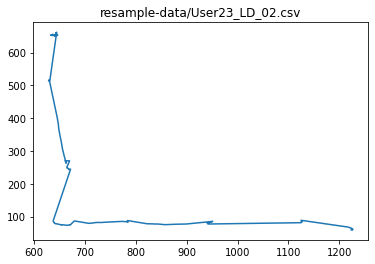

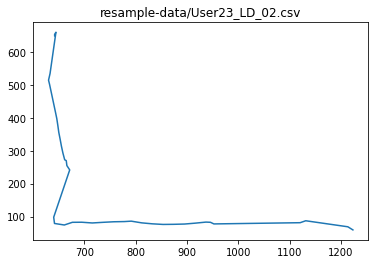

resample-data/User24_RD_02.csv


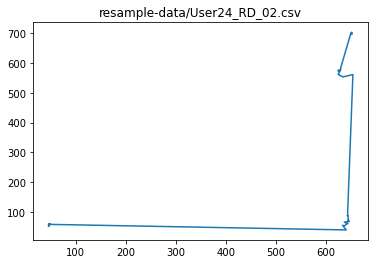

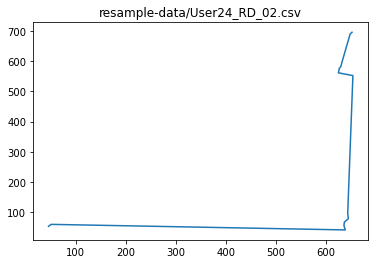

resample-data/User26_LU_02.csv


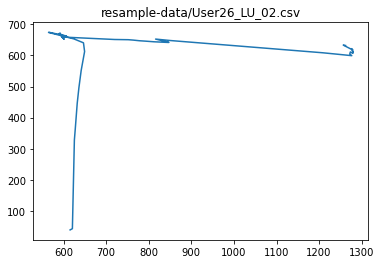

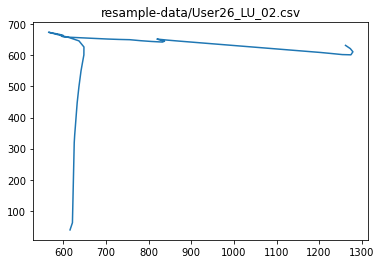

resample-data/User23_LD_01.csv


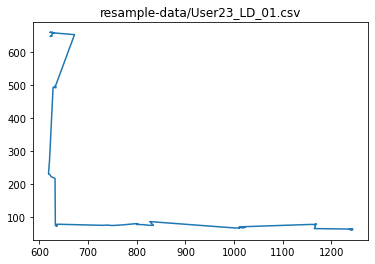

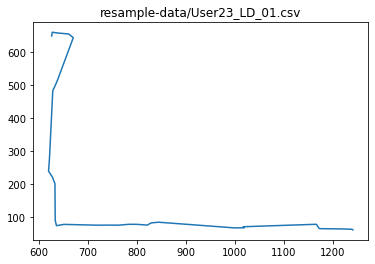

resample-data/User27_DL_02.csv


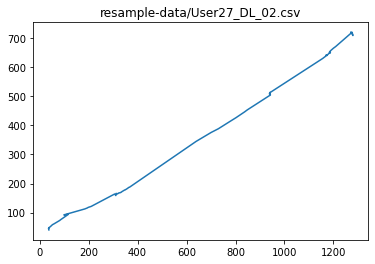

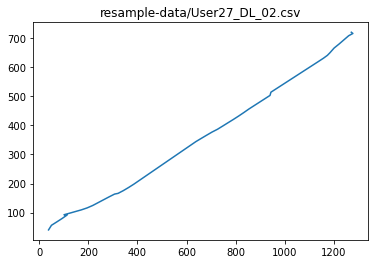

resample-data/User23_LU_01.csv


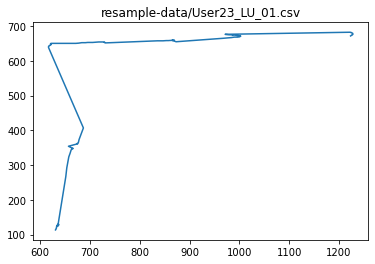

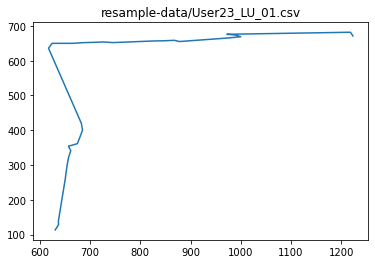

resample-data/User24_RU_02.csv


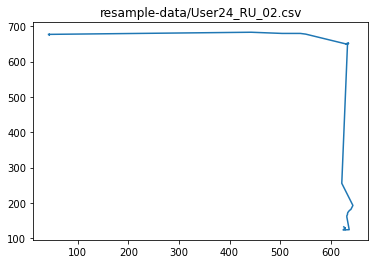

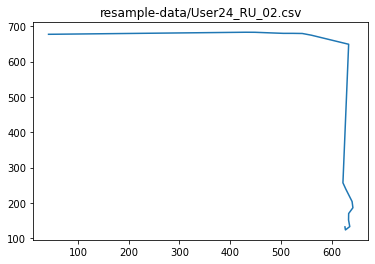

resample-data/User26_LD_02.csv


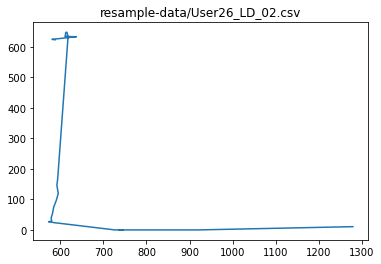

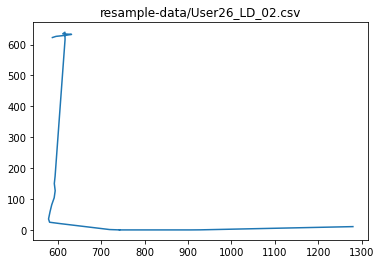

resample-data/User25_DU_01.csv


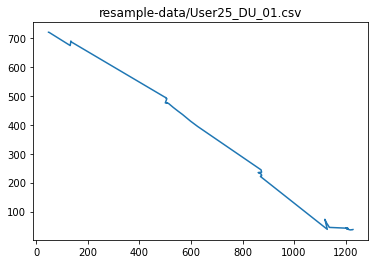

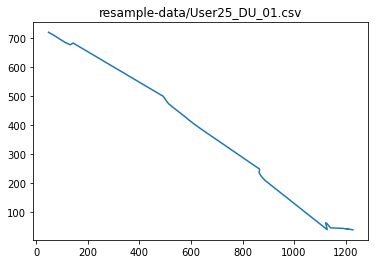

resample-data/User27_DL_01.csv


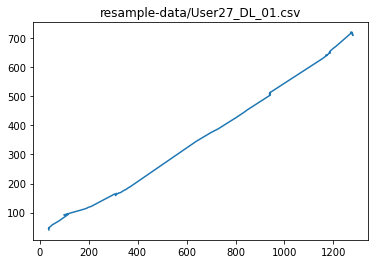

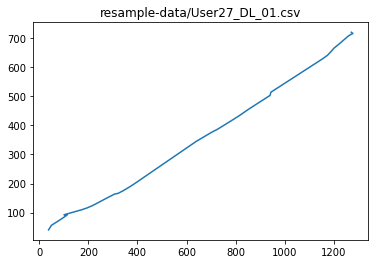

resample-data/User23_LU_02.csv


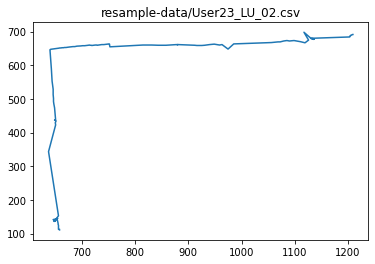

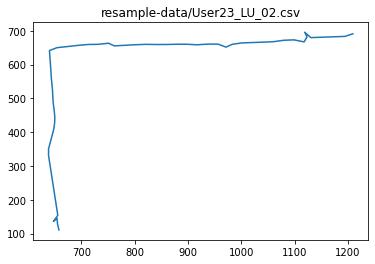

resample-data/User26_LD_01.csv


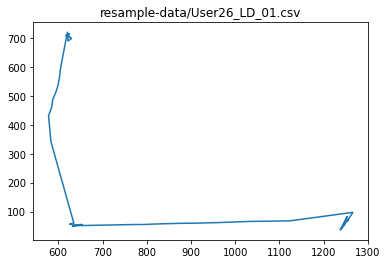

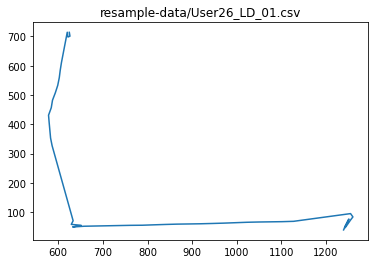

resample-data/User24_RU_01.csv


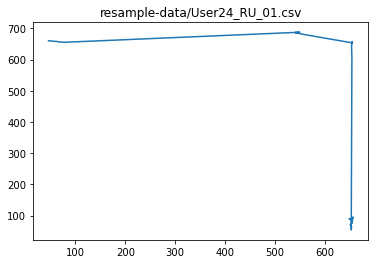

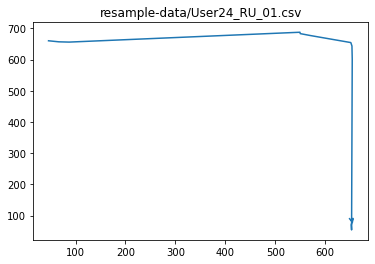

resample-data/User25_DU_02.csv


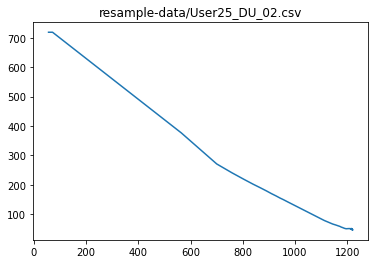

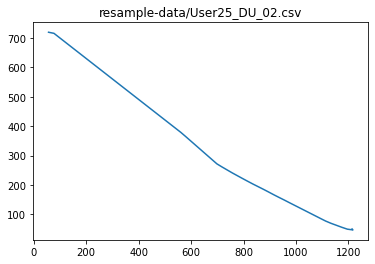

resample-data/User23_DU_01.csv


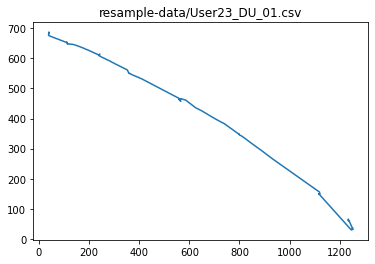

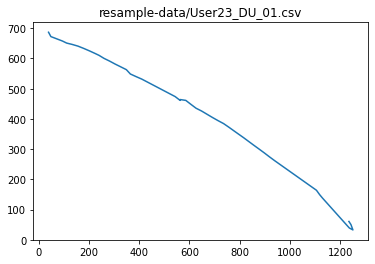

resample-data/User25_LU_01.csv


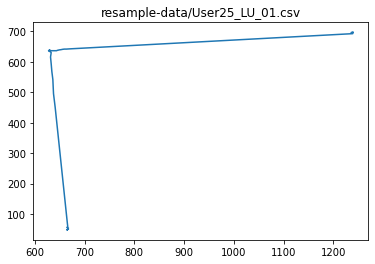

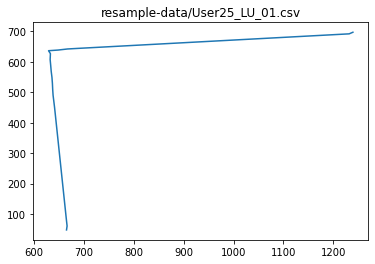

resample-data/User27_RD_01.csv


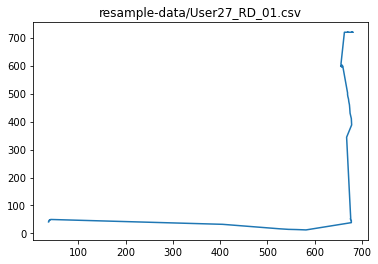

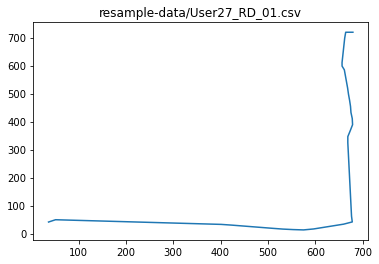

resample-data/User23_DU_02.csv


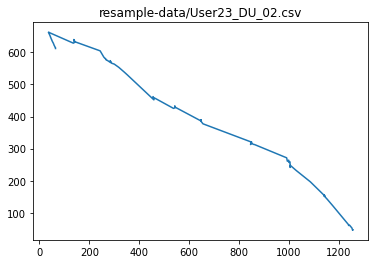

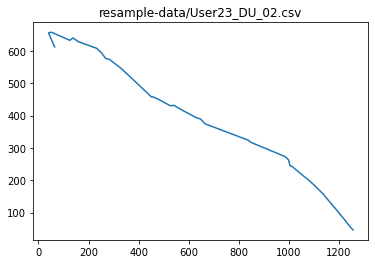

resample-data/User27_RD_02.csv


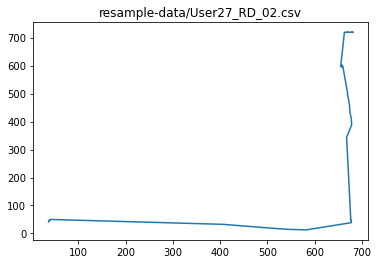

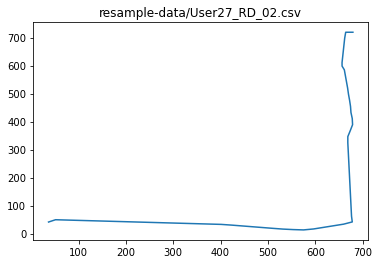

resample-data/User25_LU_02.csv


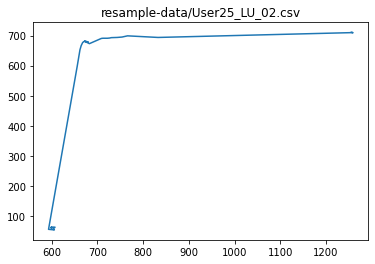

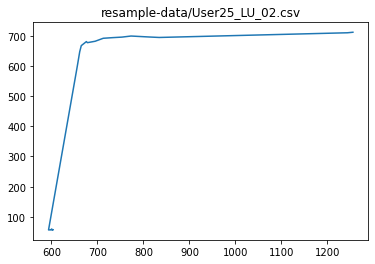

resample-data/User26_DL_02.csv


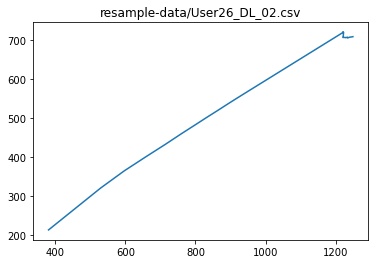

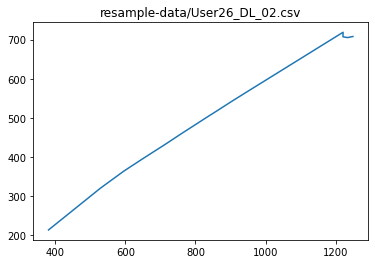

resample-data/User24_DU_01.csv


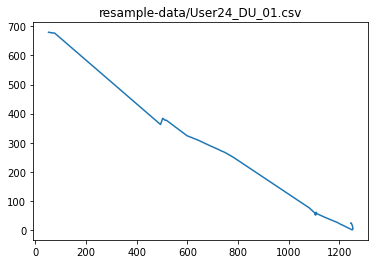

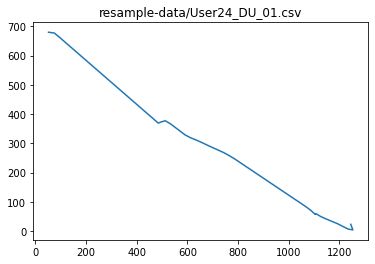

resample-data/User25_RU_02.csv


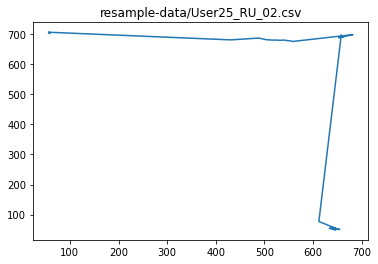

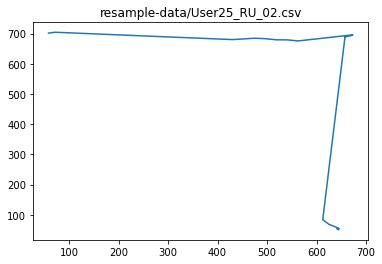

resample-data/User27_LD_02.csv


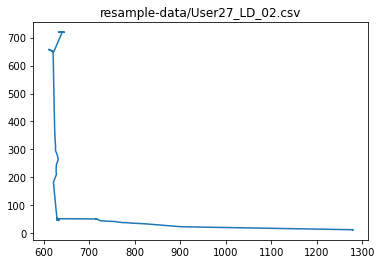

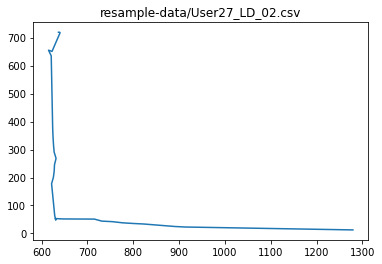

resample-data/User26_DL_01.csv


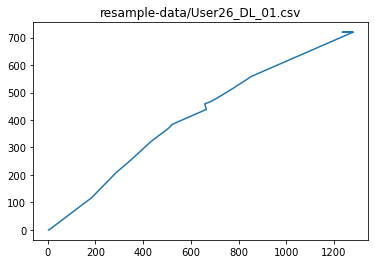

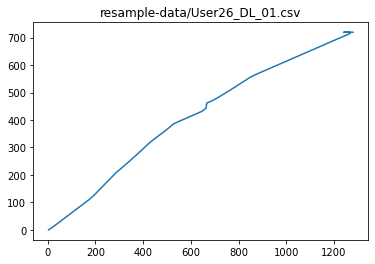

resample-data/User24_DU_02.csv


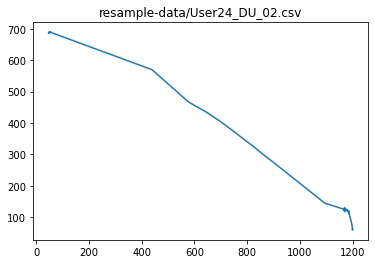

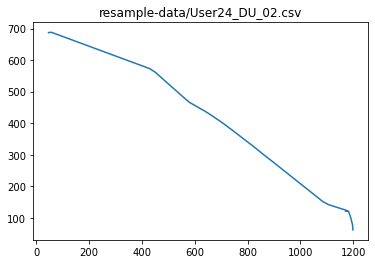

resample-data/User27_LD_01.csv


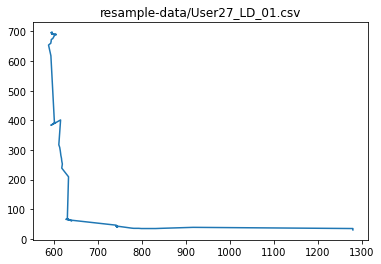

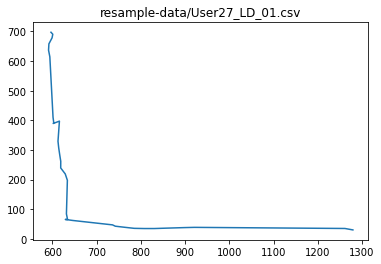

resample-data/User25_RU_01.csv


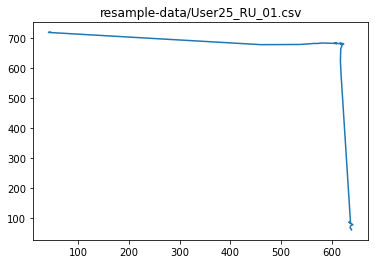

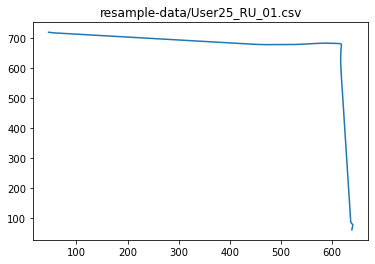

resample-data/User23_RU_02.csv


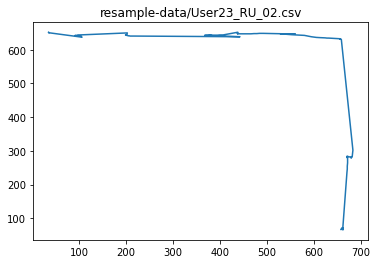

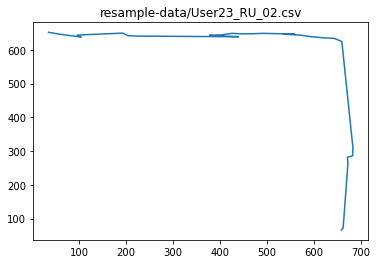

resample-data/User24_LU_01.csv


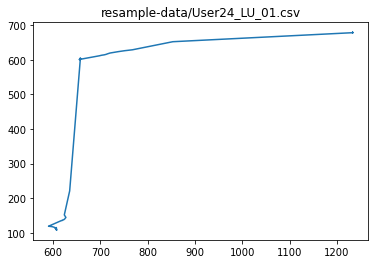

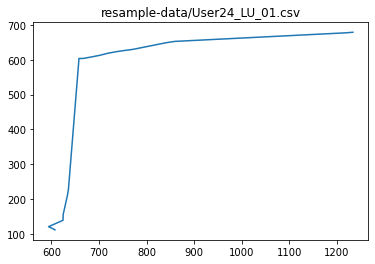

resample-data/User26_RD_01.csv


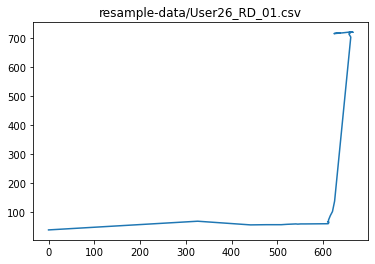

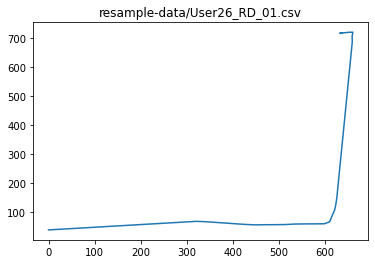

resample-data/User23_RU_01.csv


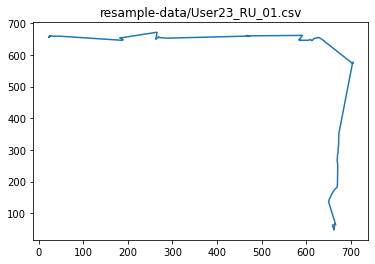

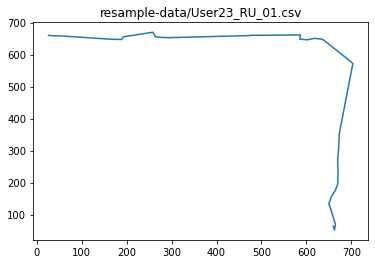

resample-data/User26_RD_02.csv


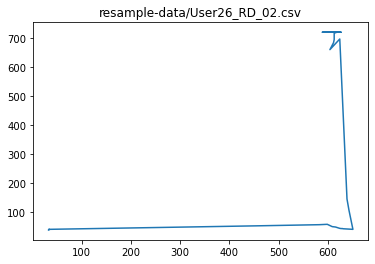

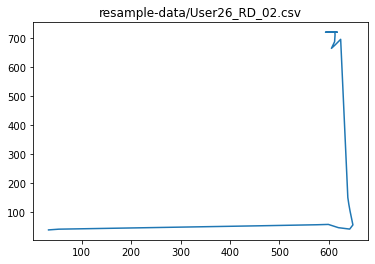

resample-data/User24_LU_02.csv


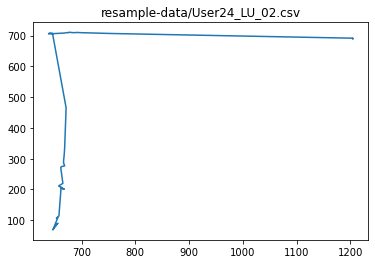

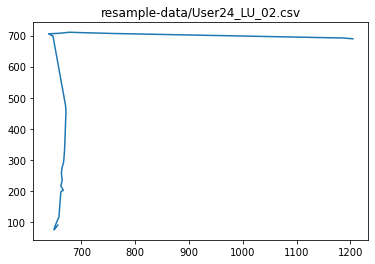

In [4]:
import pandas as pd
import math
import os
import glob
import matplotlib.pyplot as plt

def delta(col, ind1, ind2=None):
    if ind2 == None:
        return col[ind1] - col[ind1-1]
    return col[ind1] - col[ind2]

def cleanData(df):
    # delete rows that have repeated values that are the same as the one right above. 
    try: 
        for index, row in df.iterrows():
            if row[1] == df.iloc[index-1][1] and row[2] == df.iloc[index-1][2]:
                df = df.drop(labels=index, axis=0)
    except:
        pass

def calculateRubine(df):
    cleanData(df)
    x_col = df.iloc[:, 1]
    y_col = df.iloc[:, 2]
    f8 = 0
    for i in range(1, df.shape[0], 1):
        f8 += math.sqrt(delta(x_col, i)**2 + delta(y_col, i)**2)
    return x_col, y_col, f8

def indexPoint(df, startX, startY):
    df[startX]

def resample():
    path = "resample-data/"
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    for f in csv_files:
        df = pd.read_csv(f, header=None)
        x_col, y_col, length = calculateRubine(df)
        results = [[x_col[0], y_col[0]]]
        unit = length / 63
        ind = 1
        while ind < 64:
            # if unit*ind is between some points, then interpolate the point between these two points, 
            # otherwise, index to next point and repeat the first step.
            f8 = 0
            num = 0
            while True:
                if unit * ind > f8:
                    f8_change = math.sqrt(delta(x_col, num + 1) ** 2 + delta(y_col, num + 1) ** 2)
                    f8 += f8_change
                    num += 1
                else:
                    x_value = x_col[num - 1] + (unit * ind - (f8 - f8_change)) * (x_col[num] - x_col[num - 1]) / f8_change
                    y_value = y_col[num - 1] + (unit * ind - (f8 - f8_change)) * (y_col[num] - y_col[num - 1]) / f8_change
                    results.append([x_value, y_value])
                    ind += 1
                    break
        df_result = pd.DataFrame(results)
        folder = f.split("/")[0] + "-new"
        name = f.split("/")[1].split(".")[0] + "_resampled.csv"
        df_result.to_csv(folder + "/" + name, header=False, index=False)
        print(f)
        fig, ax = plt.subplots()
        ax.plot(x_col, y_col)
        plt.title(f'{f}')
        fig, bx = plt.subplots()
        bx.plot(df_result.iloc[:,0], df_result.iloc[:,1])
        plt.title(f'{f}')
        plt.show()


        
if __name__ == "__main__":
    resample()